<a href="https://colab.research.google.com/github/Gouthammajjari/assignment_2/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Gouthammajjari/assignment_2/main/Housing.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [103]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

In [104]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df[input_features + [output_feature]], train_size = 0.8, test_size = 0.2, random_state = 100)

In [105]:
X_train = df_train[input_features].to_numpy()
y_train = df_train[output_feature].to_numpy()
X_val = df_test[input_features].to_numpy()
y_val = df_test[output_feature].to_numpy()

In [147]:
#alpha is a learning rate and lambdaa is a regularization term
def Linear_Regression(X_train, y_train, X_val, y_val, epochs, alpha, lambdaa = 0):
  training_loss = []
  validation_loss = []

  m, n = X_train.shape
  np.random.seed(0)
  theta = np.random.randn(n+1,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]
  y_train = y_train.reshape(m,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

  for iteration in range(epochs):
      gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambdaa * np.concatenate((np.zeros((1,1)), theta[1:]))) ## adding penalties for parameters starting from theta1
      theta -= alpha * gradients

      train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) + np.sum(np.square(theta[1:]))) ##adding penalties for parameters starting from theta1
      theta -= alpha * gradients
      val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

      training_loss.append(train_loss)
      validation_loss.append(val_loss)
  return theta, training_loss, validation_loss

Problem 1a

---



In [148]:
theta_alpha_1, train_loss_alpha_1, val_loss_alpha_1  = Linear_Regression(X_train, y_train, X_val, y_val,1000, alpha = 0.00000001)
theta_alpha_2, train_loss_alpha_2, val_loss_alpha_2  = Linear_Regression(X_train, y_train, X_val, y_val,1000, alpha = 0.000000001)
theta_alpha_3, train_loss_alpha_3, val_loss_alpha_3  = Linear_Regression(X_train, y_train, X_val, y_val,20, alpha = 0.0001)
theta_alpha_4, train_loss_alpha_4, val_loss_alpha_4  = Linear_Regression(X_train, y_train, X_val, y_val,20, alpha = 0.001)

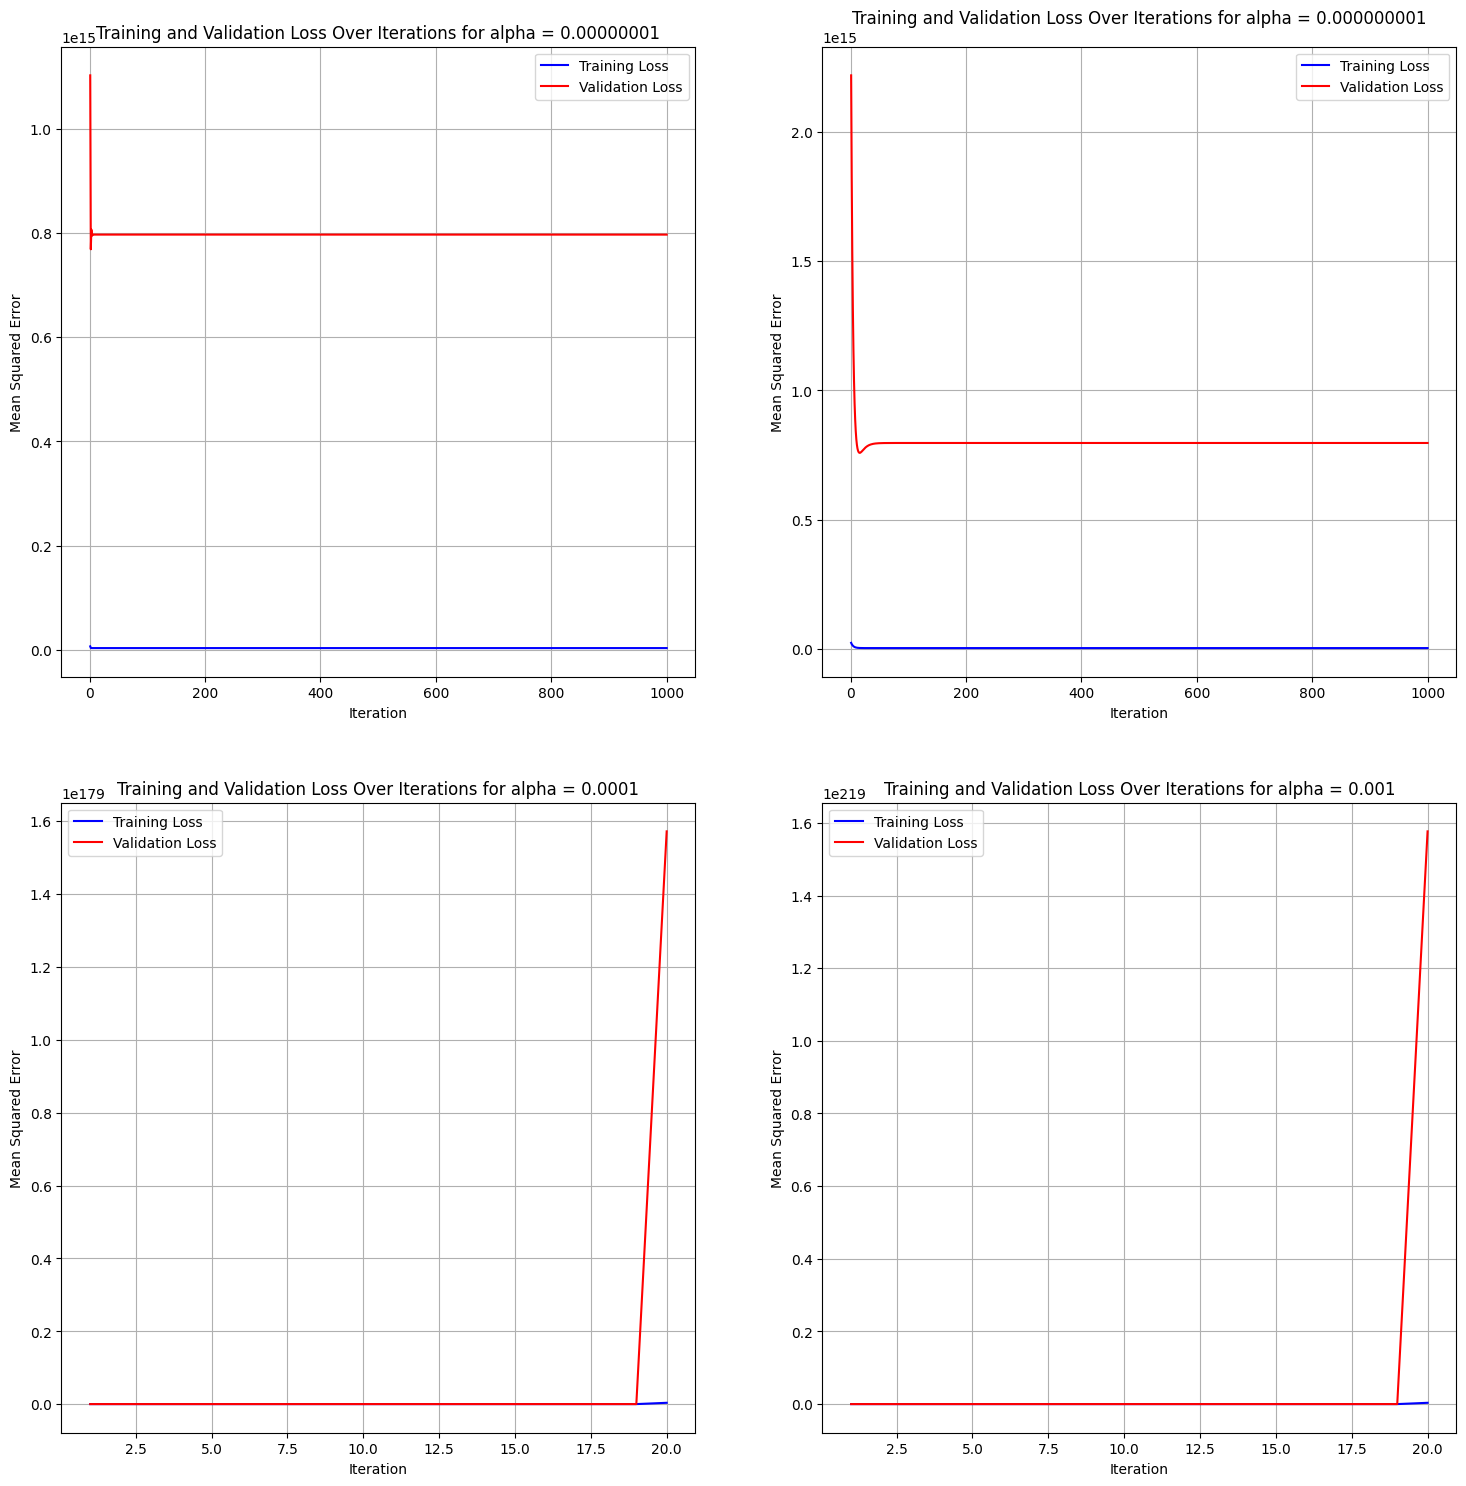

In [149]:
plt.figure(figsize=(18, 18))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(train_loss_alpha_1) + 1), train_loss_alpha_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_1) + 1), val_loss_alpha_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.00000001")
plt.grid()
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(range(1, len(train_loss_alpha_2) + 1), train_loss_alpha_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_2) + 1), val_loss_alpha_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.000000001")
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(range(1, len(train_loss_alpha_3) + 1), train_loss_alpha_3, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_3) + 1), val_loss_alpha_3, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.0001")
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(range(1, len(train_loss_alpha_4) + 1), train_loss_alpha_4, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_4) + 1), val_loss_alpha_4, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.001")
plt.legend()
plt.grid()
plt.show()

In [150]:
train_loss_alpha_1[-1], val_loss_alpha_1[-1], train_loss_alpha_2[-1], val_loss_alpha_2[-1]

(3379871232409.9663, 796647078480840.9, 3380173218478.3516, 796684516828639.1)

In [155]:
train_loss_alpha_3[-1], val_loss_alpha_3[-1], train_loss_alpha_4[-1], val_loss_alpha_4[-1]

(3.5269586694256177e+176,
 1.5721320491327366e+179,
 3.537695576202183e+216,
 1.576689744099916e+219)

In [151]:
theta_alpha_1

array([[ 16.3417569 ],
       [861.85993378],
       [ 55.9003267 ],
       [ 34.25905623],
       [ 51.07603285],
       [ 10.42496816]])

In [152]:
theta_alpha_2


array([[3.35021388e+00],
       [8.61907461e+02],
       [6.85379458e+00],
       [5.61356865e+00],
       [7.02507227e+00],
       [2.72486018e-01]])

In [153]:
theta_alpha_3

array([[-1.11487543e+81],
       [-6.73671059e+84],
       [-3.32431780e+81],
       [-1.48346826e+81],
       [-2.05429979e+81],
       [-9.51526885e+80]])

In [154]:
theta_alpha_4

array([[-1.11649030e+101],
       [-6.74646856e+104],
       [-3.32913300e+101],
       [-1.48561704e+101],
       [-2.05727540e+101],
       [-9.52905151e+100]])

for alpha = 0.00000001 and alpha = 0.000000001 , we can see that validation loss is saturated, but the model is overfitting for alpha = 0.0001 and alpha = 0.001 as the training loss and validation losss diverge each other. So, we can consider the alpha as 0.00000001 for better model relatively.

**Problem 1b**


In [111]:
input_features_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
output_features_2 = 'price'

In [112]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [113]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  0 non-null      float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


In [115]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train_2, df_test_2 = train_test_split(df[input_features_2 + [output_features_2]], train_size = 0.8, test_size = 0.2, random_state = 100)

In [116]:
X_train_2 = df_train_2[input_features_2].to_numpy()
y_train_2 = df_train_2['price'].to_numpy()
X_val_2 = df_test_2[input_features_2].to_numpy()
y_val_2 = df_test_2['price'].to_numpy()

In [156]:
theta_alpha_5, train_loss_alpha_5, val_loss_alpha_5 = Linear_Regression(X_train_2, y_train_2, X_val_2, y_val_2,25, alpha =  0.00000001)
print("Done 1")
theta_alpha_6, train_loss_alpha_6, val_loss_alpha_6  = Linear_Regression(X_train_2, y_train_2, X_val_2, y_val_2,25, alpha = 0.001)

Done 1


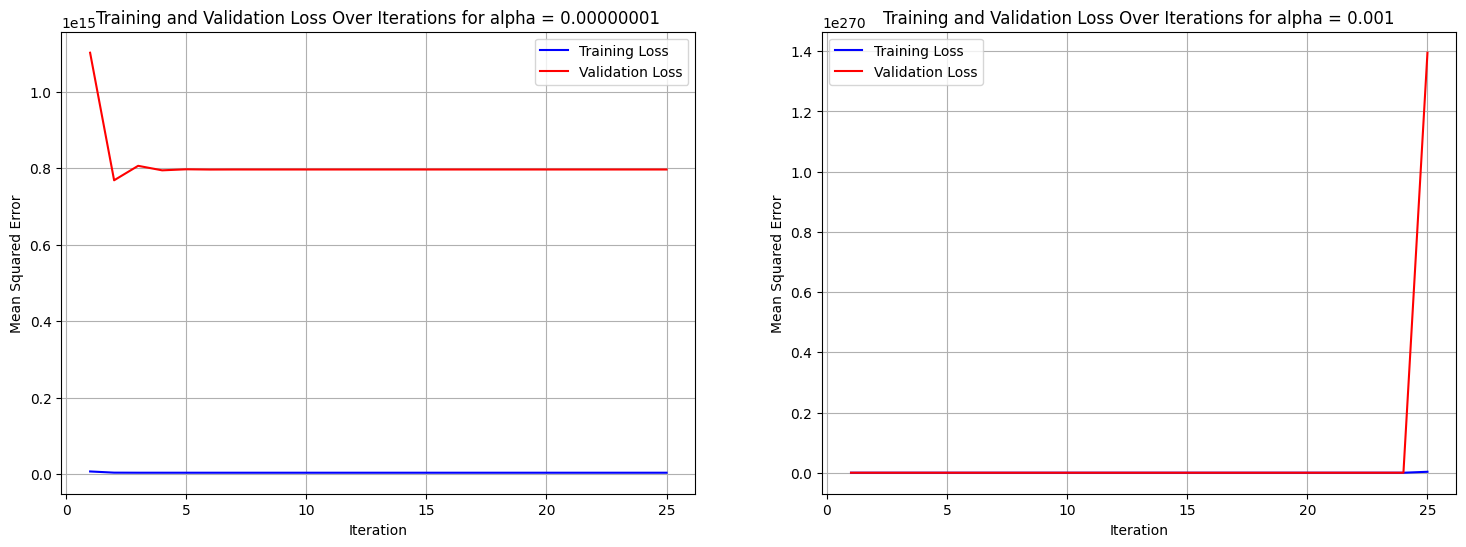

In [118]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_3) + 1), train_loss_alpha_3, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_3) + 1), val_loss_alpha_3, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.00000001")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_4) + 1), train_loss_alpha_4, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_4) + 1), val_loss_alpha_4, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.001")
plt.legend()
plt.grid()
plt.show()

In [158]:
theta_alpha_5

array([[ 2.26752475e+00],
       [ 8.61911188e+02],
       [ 2.76635152e+00],
       [ 3.22634757e+00],
       [ 3.35397421e+00],
       [-5.38603923e-01],
       [ 1.11774619e+00],
       [ 1.17058972e-01],
       [-2.78205390e-02],
       [ 7.66486856e-01],
       [ 5.47747565e-01],
       [ 1.63962837e+00]])

In [159]:
theta_alpha_6

array([[3.32130650e+126],
       [2.00692203e+130],
       [9.90341882e+126],
       [4.41937516e+126],
       [6.11992968e+126],
       [3.01093182e+126],
       [6.53416577e+125],
       [1.22480726e+126],
       [1.84370299e+125],
       [1.12887052e+126],
       [2.83467761e+126],
       [8.96909346e+125]])

In [160]:
train_loss_alpha_5[-1], val_loss_alpha_5[-1], train_loss_alpha_6[-1], val_loss_alpha_6[-1]

(3380196950665.692,
 796687714289551.1,
 3.130606508273659e+267,
 1.3952571845470238e+270)

Validation Loss and Training Loss are diverging here. Training Loss for this data without input normalization or standardization is less while validation loss is huge. which corresponds to Overfitting.


**Problem 2a**

In [166]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer_input = MinMaxScaler()
standardizer_input = StandardScaler()
normalizer_output = MinMaxScaler()
standardizer_output = StandardScaler()

X_train_normalize = normalizer_input.fit_transform(df_train[input_features])
y_train_normalize = normalizer_output.fit_transform(df_train[[output_feature]])

X_test_normalize = normalizer_input.transform(df_test[input_features])
y_test_normalize = normalizer_output.transform(df_test[[output_feature]])

X_train_standard = normalizer_input.fit_transform(df_train[input_features])
y_train_standard = standardizer_output.fit_transform(df_train[[output_feature]])

X_test_standard = normalizer_input.transform(df_test[input_features])
y_test_standard = standardizer_output.transform(df_test[[output_feature]])


In [167]:
theta_alpha_normal_input, train_loss_alpha_normal_input, val_loss_alpha_normal_input = Linear_Regression(X_train_normalize,
                                                                                       y_train,
                                                                                       X_test_normalize,
                                                                                       y_val ,2000, alpha = 0.01)
print("Done 1")
theta_alpha_normal_input_1, train_loss_alpha_normal_input_1, val_loss_alpha_normal_input_1 = Linear_Regression(X_train_normalize,
                                                                                       y_train,
                                                                                       X_test_normalize,
                                                                                       y_val, 2000, alpha = 0.1)

theta_alpha_normal, train_loss_alpha_normal, val_loss_alpha_normal = Linear_Regression(X_train_normalize,
                                                                                       y_train_normalize,
                                                                                       X_test_normalize,
                                                                                       y_test_normalize ,2000, alpha = 0.01)
print("Done 1")
theta_alpha_normal_1, train_loss_alpha_normal_1, val_loss_alpha_normal_1 = Linear_Regression(X_train_normalize,
                                                                                       y_train_normalize,
                                                                                       X_test_normalize,
                                                                                       y_test_normalize, 2000, alpha = 0.1)

Done 1
Done 1


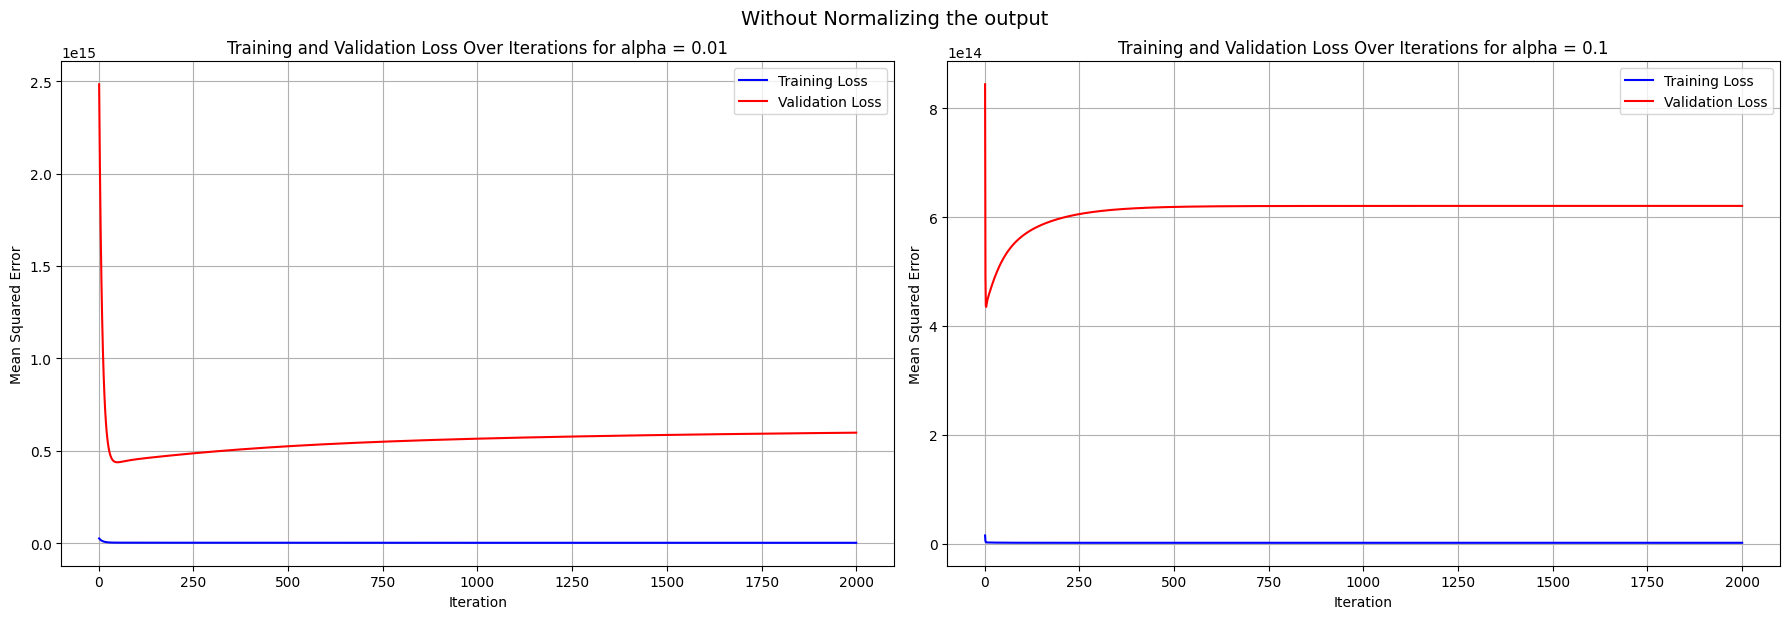

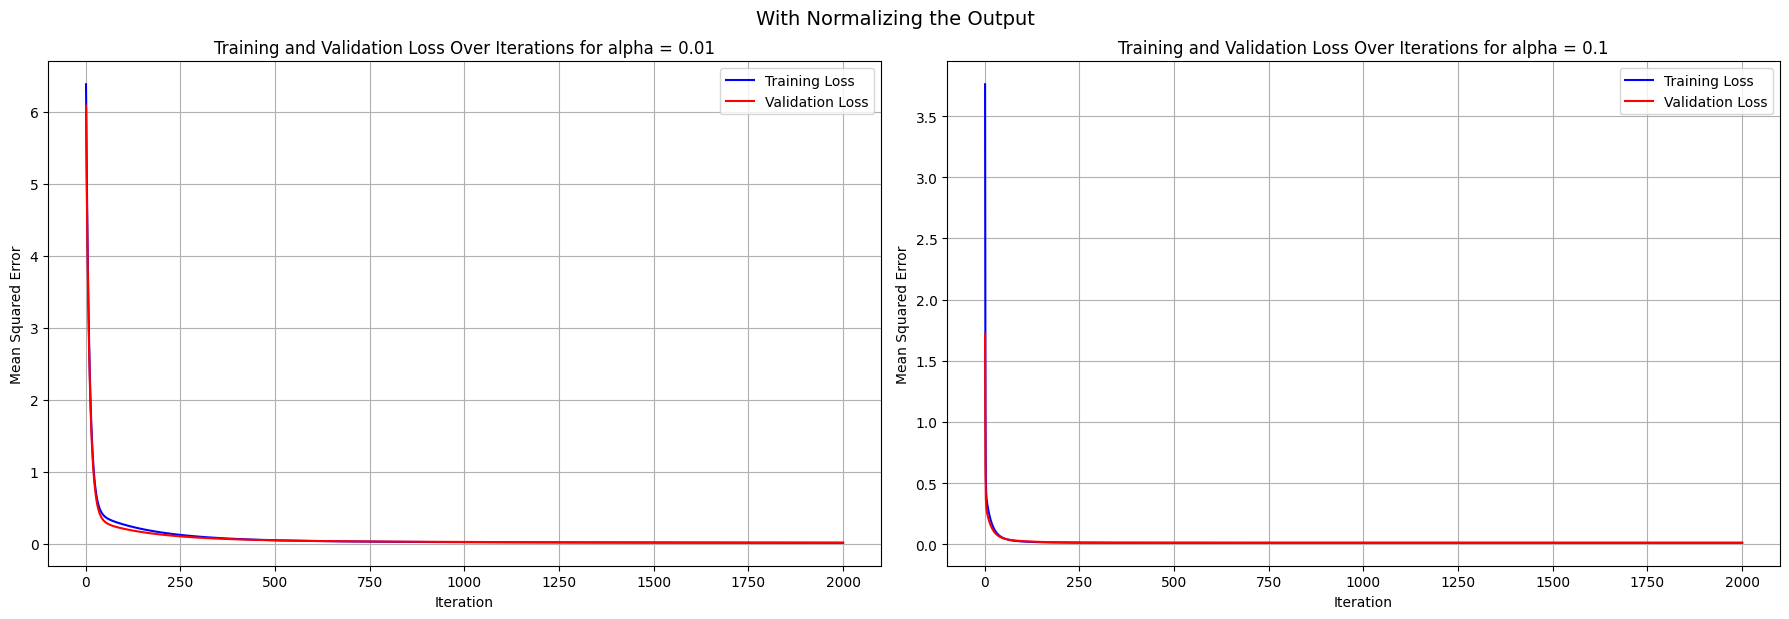

In [168]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_input) + 1), train_loss_alpha_normal_input, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input) + 1), val_loss_alpha_normal_input, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_input_1) + 1), train_loss_alpha_normal_input_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_1) + 1), val_loss_alpha_normal_input_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal) + 1), train_loss_alpha_normal, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal) + 1), val_loss_alpha_normal, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_1) + 1), train_loss_alpha_normal_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_1) + 1), val_loss_alpha_normal_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

plt.show()


In [169]:
theta_alpha_standard_input, train_loss_alpha_standard_input, val_loss_alpha_standard_input = Linear_Regression(X_train_standard,
                                                                                                               y_train,
                                                                                                               X_test_standard,
                                                                                                               y_val,2000, alpha = 0.01)
theta_alpha_standard_input_1, train_loss_alpha_standard_input_1, val_loss_alpha_standard_input_1 = Linear_Regression(X_train_standard,
                                                                                                                     y_train,
                                                                                                                     X_test_standard,
                                                                                                                     y_val,2000, alpha = 0.1)

theta_alpha_standard, train_loss_alpha_standard, val_loss_alpha_standard = Linear_Regression(X_train_standard,
                                                                                       y_train_standard,
                                                                                       X_test_standard,
                                                                                       y_test_standard ,2000, alpha = 0.01)
theta_alpha_standard_1, train_loss_alpha_standard_1, val_loss_alpha_standard_1 = Linear_Regression(X_train_standard,
                                                                                       y_train_standard,
                                                                                       X_test_standard,
                                                                                       y_test_standard ,2000, alpha = 0.1)

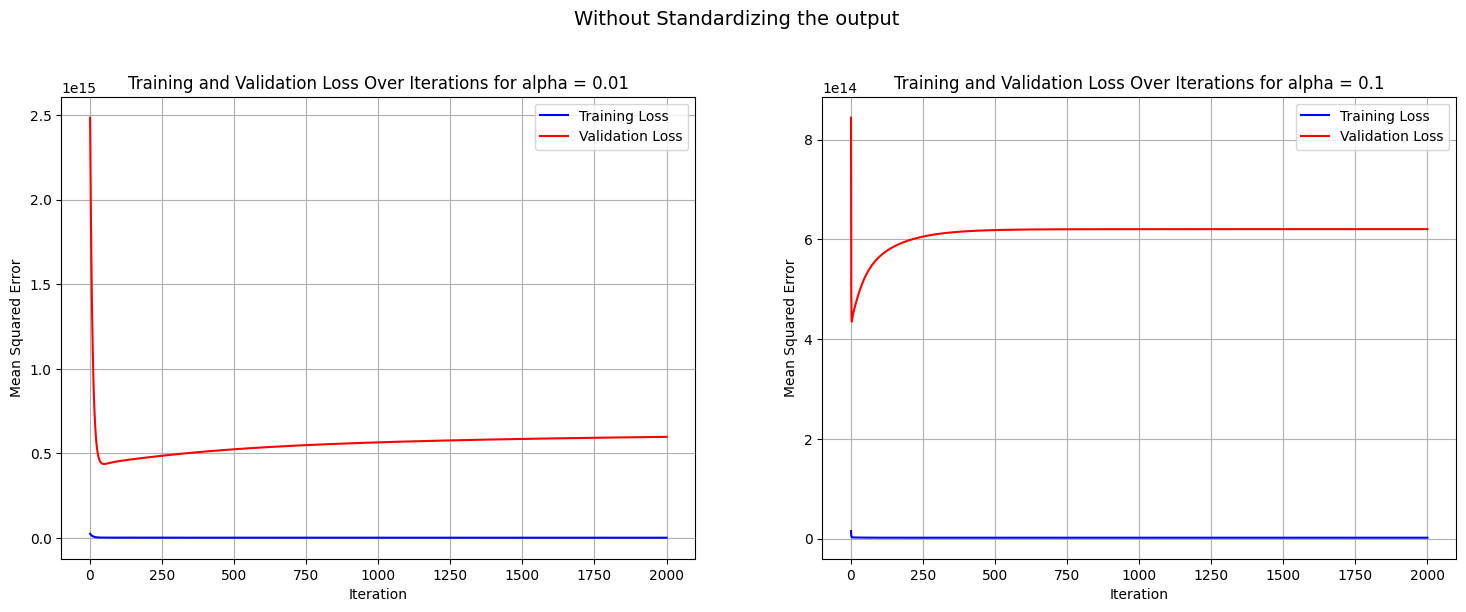

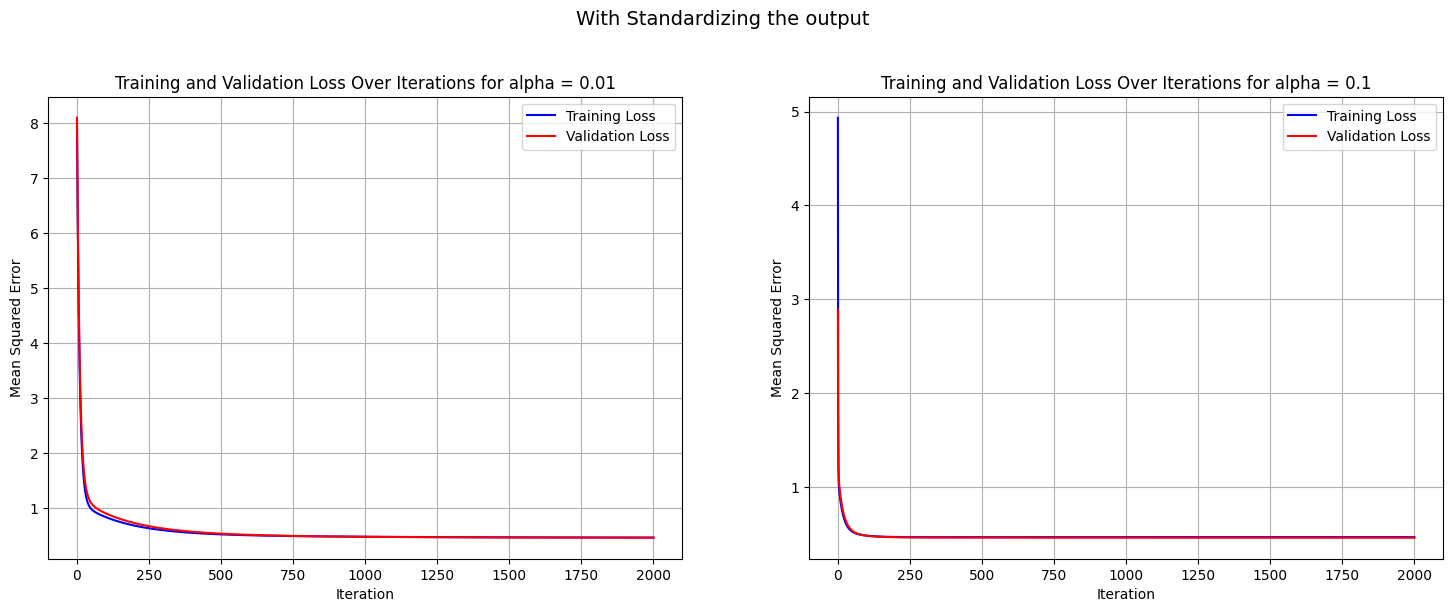

In [170]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_input) + 1), train_loss_alpha_standard_input, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input) + 1), val_loss_alpha_standard_input, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_input_1) + 1), train_loss_alpha_standard_input_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_1) + 1), val_loss_alpha_standard_input_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard) + 1), train_loss_alpha_standard, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard) + 1), val_loss_alpha_standard, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_1) + 1), train_loss_alpha_standard_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_1) + 1), val_loss_alpha_standard_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()


In [171]:
train_loss_alpha_normal[-1], train_loss_alpha_normal_1[-1], train_loss_alpha_standard[-1], train_loss_alpha_standard_1[-1]

(0.014176433690478859,
 0.012136360495069654,
 0.4669387717624579,
 0.46542548978539033)

In [172]:
val_loss_alpha_normal[-1], val_loss_alpha_normal_1[-1], val_loss_alpha_standard[-1], val_loss_alpha_standard_1[-1]

(0.015909625630756583,
 0.011967893855983788,
 0.4639519364529378,
 0.4589620647090527)

In [173]:
for i in theta_alpha_standard_1:
  for j in i:
    print(j)

-1.2774284455267806
2.616338590026038
0.29181704547024095
2.0534911776148848
0.846543182030557
0.5364641176377076


Theta values for

Min Max scaler are 0.058, 0.422, 0.044, 0.333, 0.137, 0.0868.

standard scaler -1.277, 2.616,0.291,2.053, 0.846, 0.536.


From the Above Observations, Min Max Scaler provides better training accuracy compared to standard scaler

Problem 2b

In [174]:
normalizer_input_2 = MinMaxScaler()
normalizer_output_2 = MinMaxScaler()
standardizer_input_2 = StandardScaler()
standardizer_output_2 = StandardScaler()

X_train_normalize_2 = normalizer_input_2.fit_transform(df_train_2[input_features_2])
y_train_normalize_2 = normalizer_output_2.fit_transform(df_train_2[[output_features_2]])

X_test_normalize_2 = normalizer_input_2.transform(df_test_2[input_features_2])
y_test_normalize_2 = normalizer_output_2.transform(df_test_2[[output_features_2]])

X_train_standard_2 = standardizer_input_2.fit_transform(df_train_2[input_features_2])
y_train_standard_2 = standardizer_output_2.fit_transform(df_train_2[[output_features_2]])

X_test_standard_2 = standardizer_input_2.transform(df_test_2[input_features_2])
y_test_standard_2 = standardizer_output_2.transform(df_test_2[[output_features_2]])


In [175]:
theta_alpha_normal_input_2, train_loss_alpha_normal_input_2, val_loss_alpha_normal_input_2 = Linear_Regression(X_train_normalize_2,
                                                                                                              y_train_2,
                                                                                                              X_test_normalize_2,
                                                                                                              y_val_2 ,1000, alpha = 0.01)
theta_alpha_normal_input_1_2, train_loss_alpha_normal_input_1_2, val_loss_alpha_normal_input_1_2 = Linear_Regression(X_train_normalize_2,
                                                                                                                     y_train_2,
                                                                                                                     X_test_normalize_2,
                                                                                                                     y_val_2, 1000, alpha = 0.1)

theta_alpha_normal_2, train_loss_alpha_normal_2, val_loss_alpha_normal_2 = Linear_Regression(X_train_normalize_2,
                                                                                            y_train_normalize_2,
                                                                                            X_test_normalize_2,
                                                                                            y_test_normalize_2 ,1000, alpha = 0.01)
theta_alpha_normal_1_2, train_loss_alpha_normal_1_2, val_loss_alpha_normal_1_2 = Linear_Regression(X_train_normalize_2,
                                                                                                   y_train_normalize_2,
                                                                                                   X_test_normalize_2,
                                                                                                   y_test_normalize_2, 1000, alpha = 0.1)

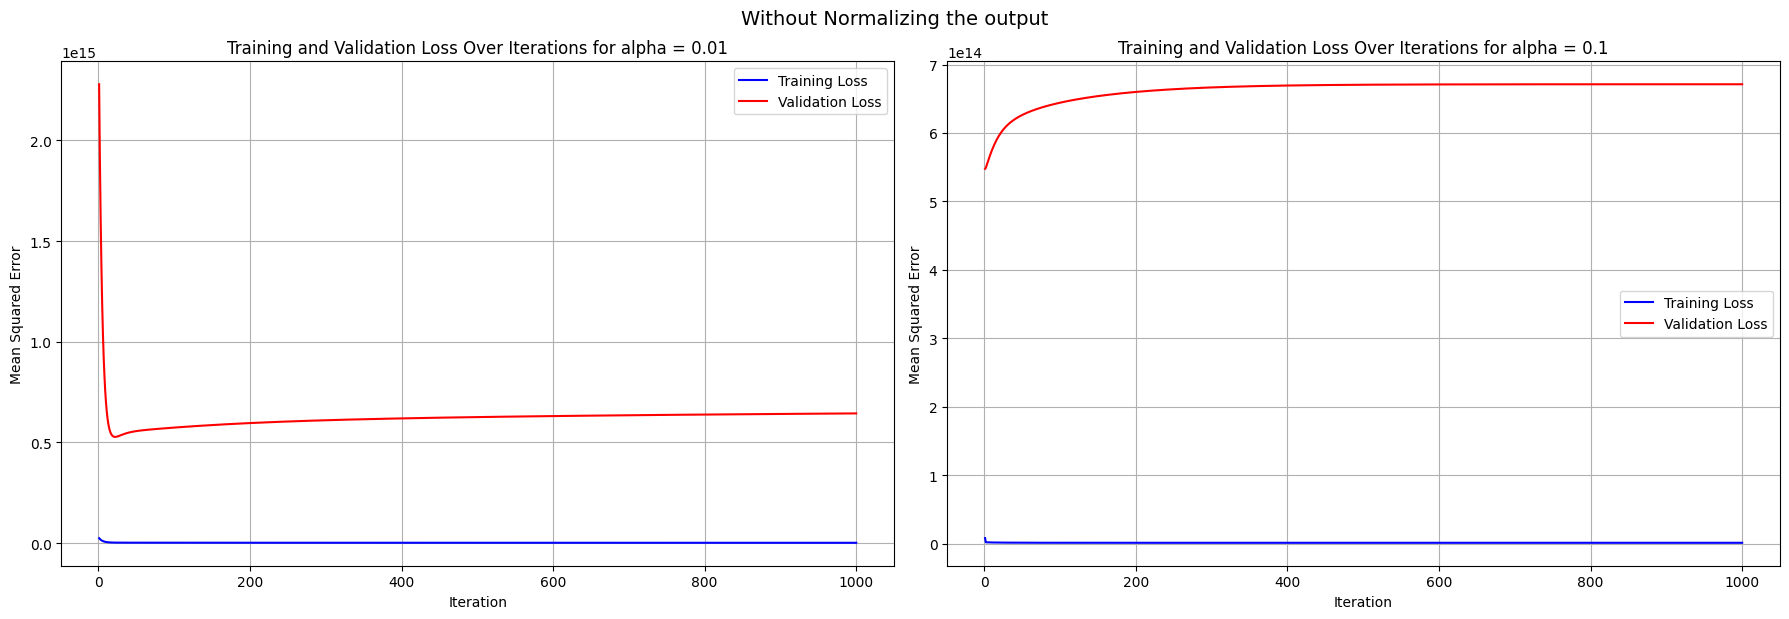

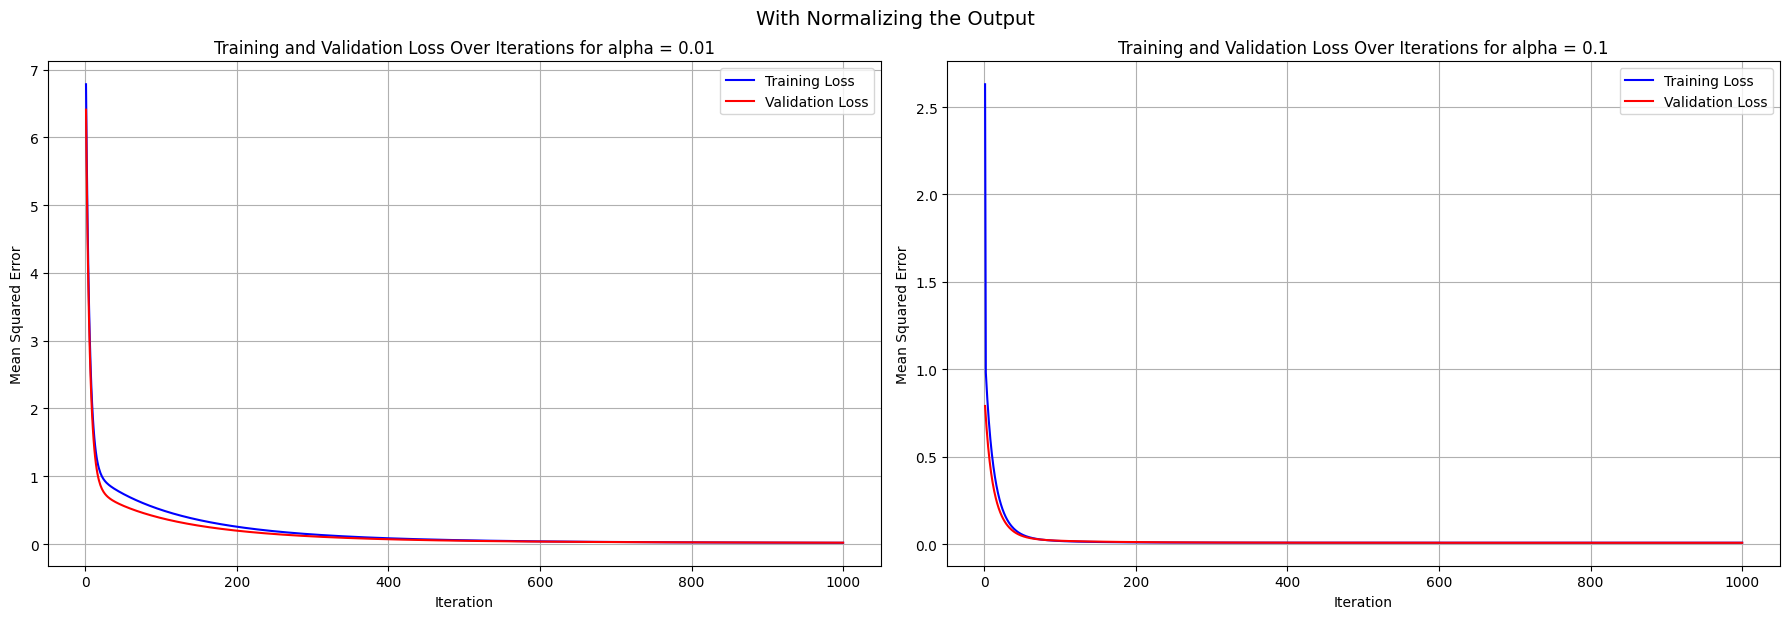

In [176]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_input_2) + 1), train_loss_alpha_normal_input_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_2) + 1), val_loss_alpha_normal_input_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_input_1_2) + 1), train_loss_alpha_normal_input_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_1_2) + 1), val_loss_alpha_normal_input_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_2) + 1), train_loss_alpha_normal_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_2) + 1), val_loss_alpha_normal_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_1_2) + 1), train_loss_alpha_normal_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_1_2) + 1), val_loss_alpha_normal_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

plt.show()


In [177]:
theta_alpha_standard_input_2, train_loss_alpha_standard_input_2, val_loss_alpha_standard_input_2 = Linear_Regression(X_train_standard_2,
                                                                                                               y_train_2,
                                                                                                               X_test_standard_2,
                                                                                                               y_val_2,1000, alpha = 0.01)
theta_alpha_standard_input_1_2, train_loss_alpha_standard_input_1_2, val_loss_alpha_standard_input_1_2 = Linear_Regression(X_train_standard_2,
                                                                                                                     y_train_2,
                                                                                                                     X_test_standard_2,
                                                                                                                     y_val_2, 1000, alpha = 0.1)

theta_alpha_standard_2, train_loss_alpha_standard_2, val_loss_alpha_standard_2 = Linear_Regression(X_train_standard_2,
                                                                                             y_train_standard_2,
                                                                                             X_test_standard_2,
                                                                                             y_test_standard_2, 500, alpha = 0.01)
theta_alpha_standard_1_2, train_loss_alpha_standard_1_2, val_loss_alpha_standard_1_2 = Linear_Regression(X_train_standard_2,
                                                                                                   y_train_standard_2,
                                                                                                   X_test_standard_2,
                                                                                                   y_test_standard_2, 500, alpha = 0.1)

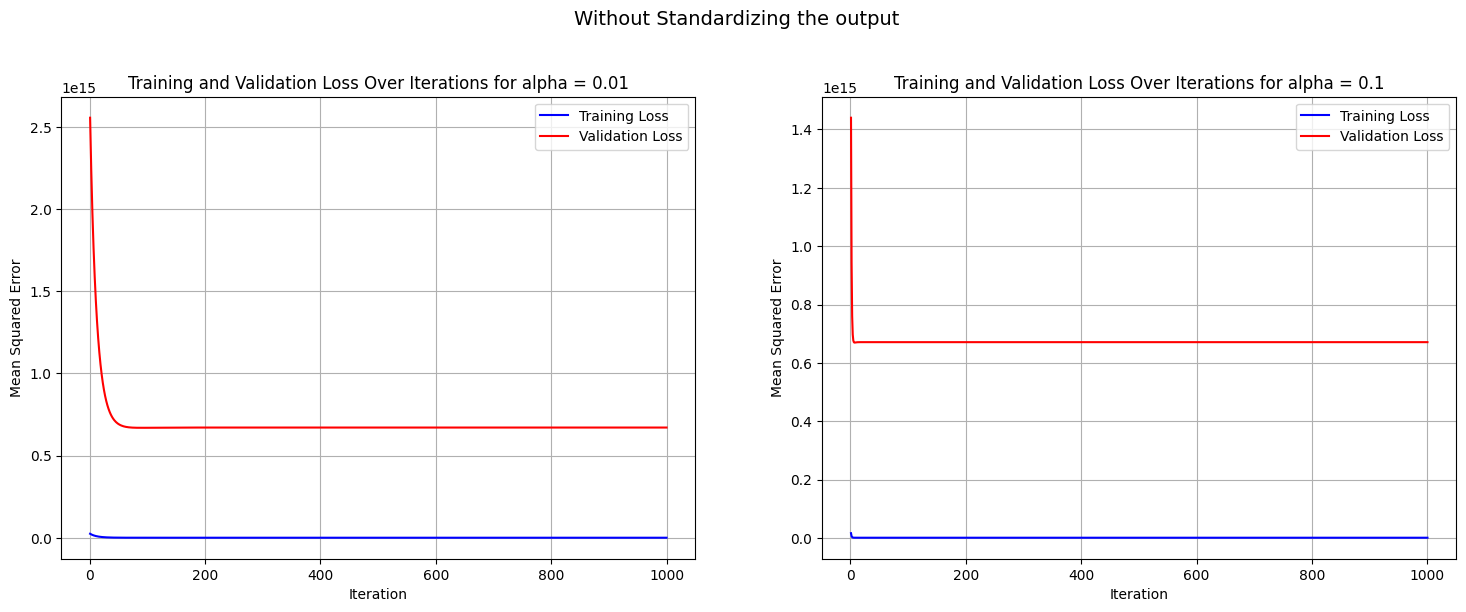

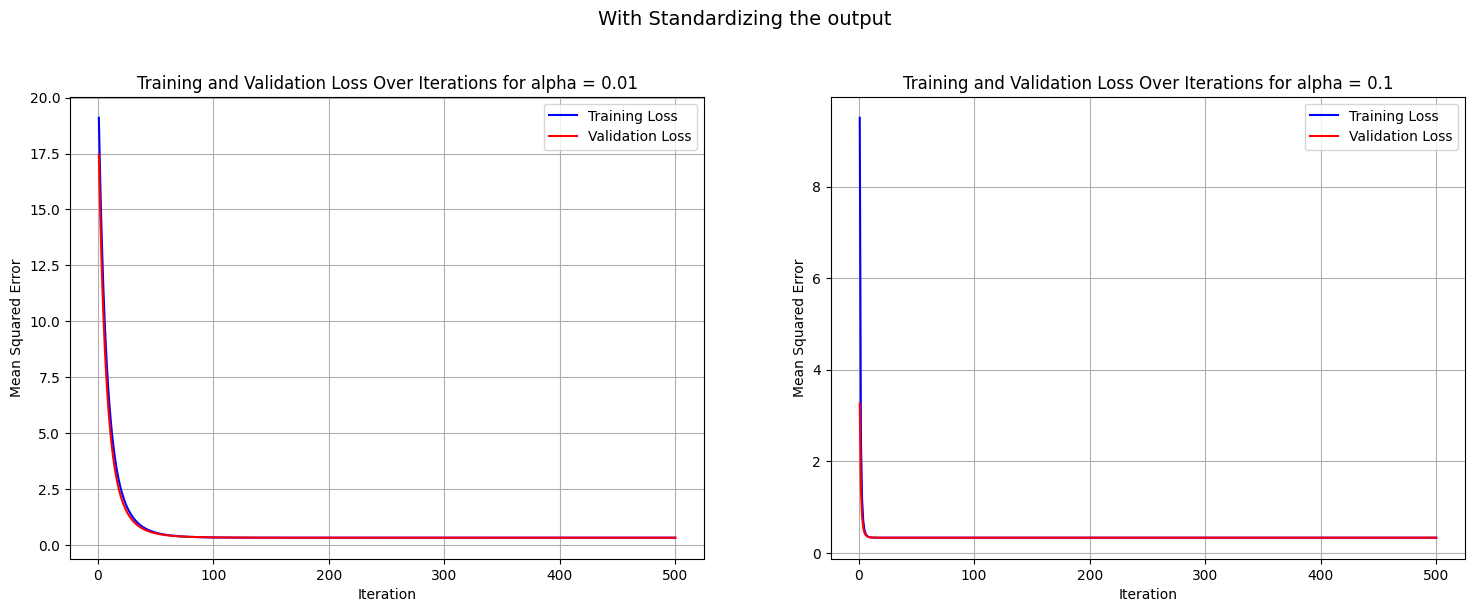

In [178]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_input_2) + 1), train_loss_alpha_standard_input_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_2) + 1), val_loss_alpha_standard_input_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_input_1_2) + 1), train_loss_alpha_standard_input_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_1_2) + 1), val_loss_alpha_standard_input_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_2) + 1), train_loss_alpha_standard_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_2) + 1), val_loss_alpha_standard_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_1_2) + 1), train_loss_alpha_standard_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_1_2) + 1), val_loss_alpha_standard_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()


In [179]:
train_loss_alpha_normal_2[-1], train_loss_alpha_normal_1_2[-1], train_loss_alpha_standard_2[-1], train_loss_alpha_standard_1_2[-1]

(0.018881551398507654,
 0.00911923883516952,
 0.3309208814927949,
 0.3309208502985197)

In [180]:
val_loss_alpha_normal_2[-1], val_loss_alpha_normal_1_2[-1], val_loss_alpha_standard_2[-1], val_loss_alpha_standard_1_2[-1]

(0.02045185756093972,
 0.008679875954373776,
 0.3322854510244032,
 0.3322934350296885)

In [181]:
for i in theta_alpha_standard_1_2:
  for j in i:
    print(j)

5.3908512663055855e-17
0.28568816203330855
0.03899116054616524
0.3101673797125565
0.19710126940249725
0.11275374471720609
0.07830662685063436
0.0779669555039397
0.10989171633049341
0.2144163883016318
0.11929555325158073
0.13711064832709657


Theta values for Min Max Scaler are 0.018, 0.293, -0.0012, 0.332, 0.112, 0.0525, 0.033, 0.0272, 0.0763, 0.0746, 0.0700, 0.533

Theta values for Standard Scaler are 5.574338898757026e-17,0.286,0.039, 0.310, 0.197, 0.112, 0.078, 0.1098, 0.214, 0.1193, 0.1371.


From the Above Observations, Min Max Scaler provides less training loss than standard scaler

Problem 3 a

Considering the Min Max scaler performance to be better and the learning rate of 0.1 and from the above plotted graphs, we can observer that normalizing the output varible is producing better results compared to data (without normalizing ) the output variable.

In [90]:
theta_lambda_0, train_loss_lambda_0, val_loss_lambda_0 = Linear_Regression(X_train_normalize,
                                                                         y_train_normalize,
                                                                         X_test_normalize,
                                                                         y_test_normalize, 2000, alpha = 0.1, lambdaa = 0)


theta_lambda_1, train_loss_lambda_1, val_loss_lambda_1 = Linear_Regression(X_train_normalize,
                                                                         y_train_normalize,
                                                                         X_test_normalize,
                                                                         y_test_normalize, 2000, alpha = 0.1, lambdaa = 1)

theta_lambda_5, train_loss_lambda_5, val_loss_lambda_5 = Linear_Regression(X_train_normalize,
                                                                         y_train_normalize,
                                                                         X_test_normalize,
                                                                         y_test_normalize, 2000, alpha = 0.1, lambdaa = 5)
theta_lambda_10, train_loss_lambda_10, val_loss_lambda_10 = Linear_Regression(X_train_normalize,
                                                                            y_train_normalize,
                                                                            X_test_normalize,
                                                                            y_test_normalize, 2000, alpha = 0.1, lambdaa = 10)


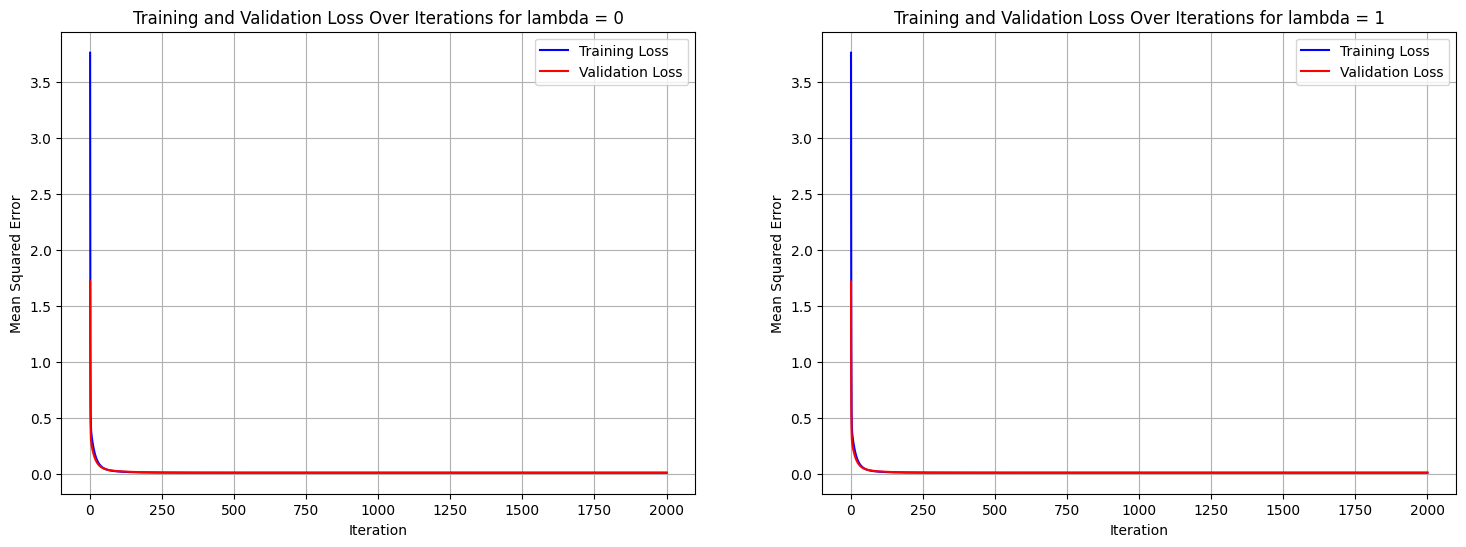

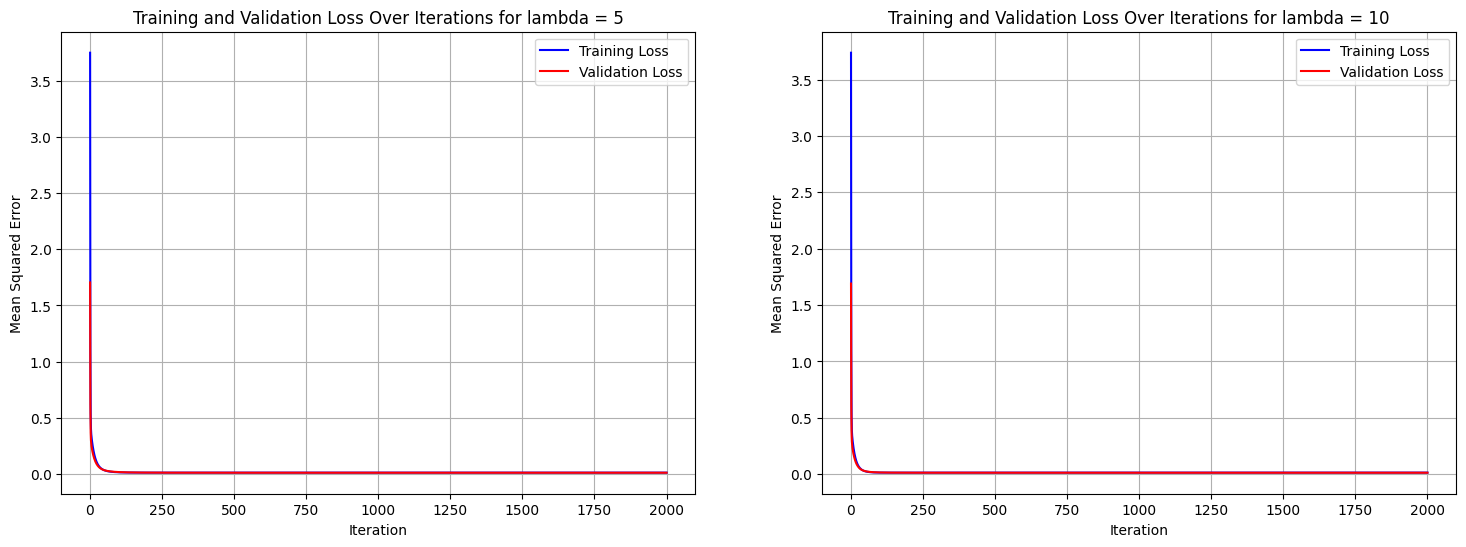

In [91]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_0) + 1), train_loss_lambda_0, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_0) + 1), val_loss_lambda_0, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 0")
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_1) + 1), train_loss_lambda_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_1) + 1), val_loss_lambda_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_5) + 1), train_loss_lambda_5, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_5) + 1), val_loss_lambda_5, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 5")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_10) + 1), train_loss_lambda_10, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_10) + 1), val_loss_lambda_10, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 10")
plt.legend()
plt.grid()
plt.show()

In [92]:
train_loss_lambda_0[-1], train_loss_lambda_1[-1], train_loss_lambda_5[-1], train_loss_lambda_10[-1]

(0.012136360495069654,
 0.012083056317870837,
 0.012472050899686908,
 0.013261402702241255)

In [93]:
val_loss_lambda_0[-1], val_loss_lambda_1[-1], val_loss_lambda_5[-1], val_loss_lambda_10[-1]

(0.011967893855983788,
 0.011743560540914428,
 0.011704879706376339,
 0.01227028288879639)

In [94]:
for i in theta_lambda_5:
  for j in i:
    print(i)

[0.08729241]
[0.28288426]
[0.06516579]
[0.24528353]
[0.13550951]
[0.10297222]


From above observations

for lambda = 0, training loss is 0.0121 with val loss = 0.0120, no
regularization

for lambda = 1, training loss is 0.0120 with val loss = 0.0118, optimal lambda value

for lambda = 5, training loss is 0.0124 with val loss = 0.0117

for lambda = 10, training loss is 0.0132 with val loss = 0.0123, implies too much regularization because loss is increasing as we increase the lambda value




Problem 3b

In [95]:
theta_lambda_2_0, train_loss_lambda_2_0, val_loss_lambda_2_0 = Linear_Regression(X_train_normalize_2,
                                                                                y_train_normalize_2,
                                                                                X_test_normalize_2,
                                                                                y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 0)


theta_lambda_2_1, train_loss_lambda_2_1, val_loss_lambda_2_1 = Linear_Regression(X_train_normalize_2,
                                                                                y_train_normalize_2,
                                                                                X_test_normalize_2,
                                                                                y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 1)

theta_lambda_2_5, train_loss_lambda_2_5, val_loss_lambda_2_5 = Linear_Regression(X_train_normalize_2,
                                                                                y_train_normalize_2,
                                                                                X_test_normalize_2,
                                                                                y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 5)

theta_lambda_2_10, train_loss_lambda_2_10, val_loss_lambda_2_10 = Linear_Regression(X_train_normalize_2,
                                                                                    y_train_normalize_2,
                                                                                    X_test_normalize_2,
                                                                                    y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 10)



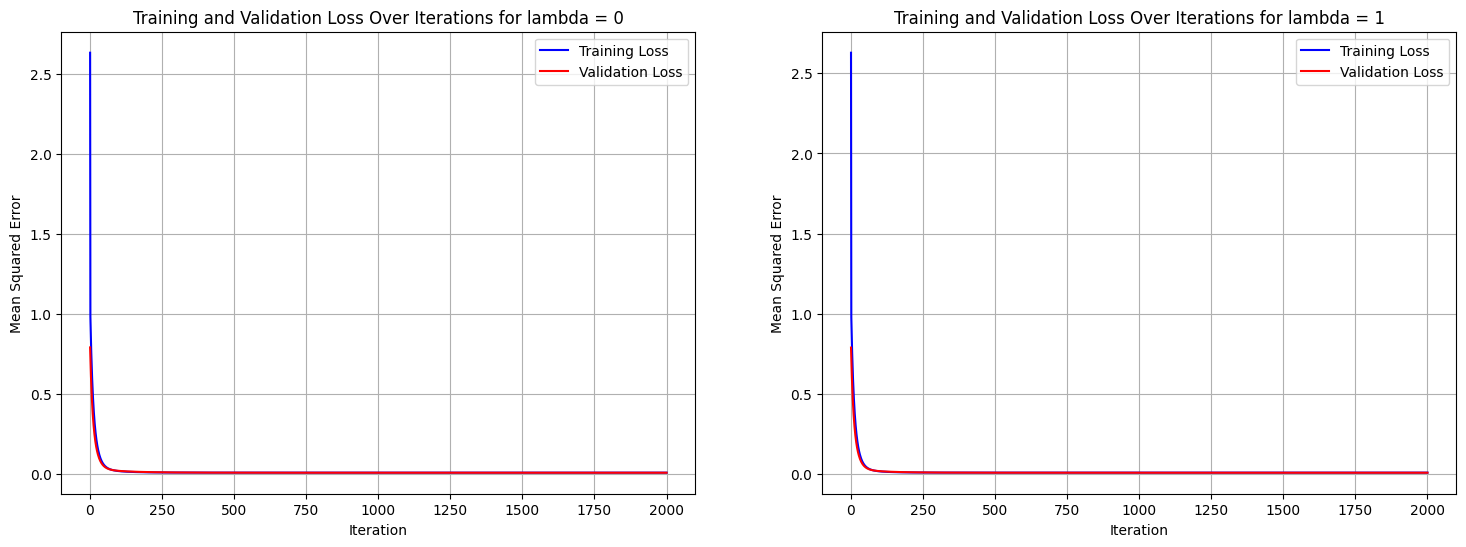

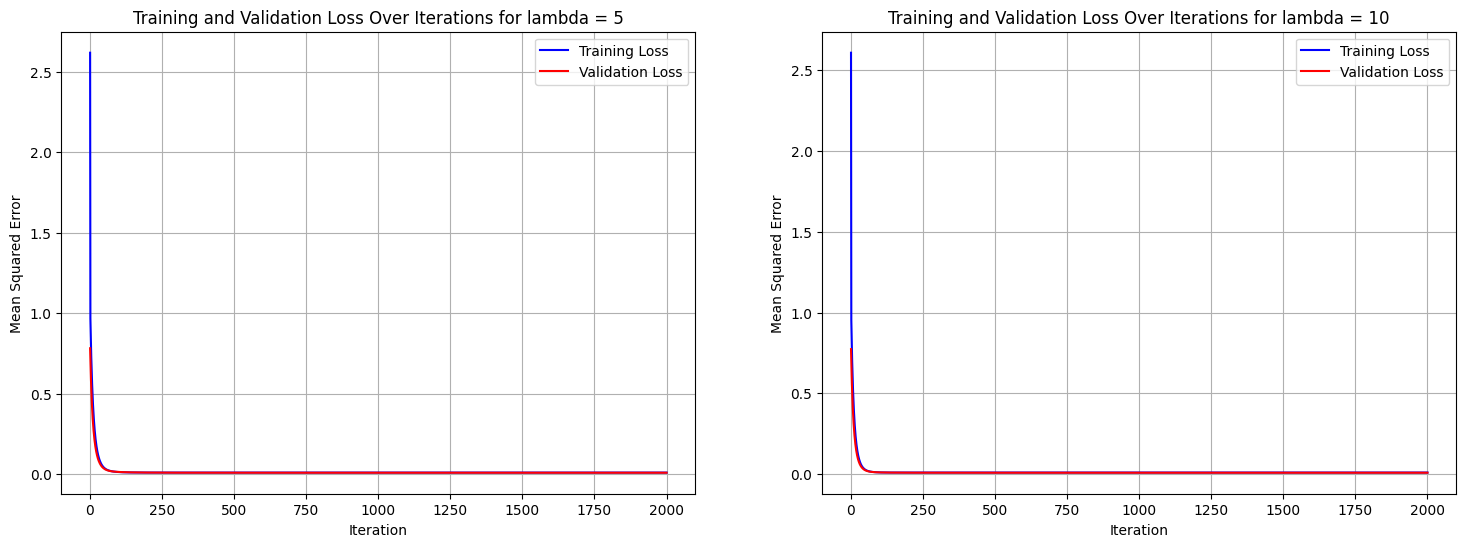

In [96]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_2_0) + 1), train_loss_lambda_2_0, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_0) + 1), val_loss_lambda_2_0, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 0")
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_2_1) + 1), train_loss_lambda_2_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_1) + 1), val_loss_lambda_2_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_2_5) + 1), train_loss_lambda_2_5, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_5) + 1), val_loss_lambda_2_5, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 5")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_2_10) + 1), train_loss_lambda_2_10, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_10) + 1), val_loss_lambda_2_10, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 10")
plt.legend()
plt.grid()
plt.show()


In [97]:
train_loss_lambda_2_0[-1], train_loss_lambda_2_1[-1], train_loss_lambda_2_5[-1], train_loss_lambda_2_10[-1]

(0.009117825278400965,
 0.009082388638743154,
 0.009331542180437325,
 0.009833119780447963)

In [98]:
val_loss_lambda_2_0[-1], val_loss_lambda_2_1[-1], val_loss_lambda_2_5[-1], val_loss_lambda_2_10[-1]

(0.008664910188188707,
 0.008515818281967213,
 0.008447134479891158,
 0.008727664580883508)

From above observations

for lambda = 0, training loss is 0.00911 with val loss = 0.0087, no regularization

for lambda = 1, training loss is 0.00908 with val loss = 0.0085, optimal lambda value

for lambda = 5, training loss is 0.00933 with val loss = 0.00845

for lambda = 10, training loss is 0.00983 with val loss = 0.00872, implies too much regularization because loss is increasing as we increase the lambda value